FONTE: https://www.kaggle.com/zalando-research/fashionmnist

### Dataset
Fashion-MNIST é um conjunto de dados das imagens dos artigos de Zalando - consistindo em um conjunto de treinamento de 60.000 exemplos e um conjunto de testes de 10.000 exemplos. Cada exemplo é uma imagem em escala de cinza de 28 x 28, associada a um rótulo de 10 classes. Zalando pretende que o Fashion-MNIST sirva como substituto direto do conjunto de dados MNIST original para algoritmos de aprendizado de máquina de benchmarking. Ele compartilha o mesmo tamanho de imagem e estrutura de divisões de treinamento e teste.

O conjunto de dados MNIST original contém muitos dígitos manuscritos. Os membros da comunidade de AI / ML / Ciência de dados amam esse conjunto de dados e o usam como referência para validar seus algoritmos. De fato, o MNIST é frequentemente o primeiro grupo de dados que os pesquisadores tentam. "Se não funcionar no MNIST, não funcionará", disseram eles. "Bem, se funcionar no MNIST, ainda poderá falhar nos outros."

Zalando procura substituir o conjunto de dados MNIST original

### Conteúdo
Cada imagem tem 28 pixels de altura e 28 pixels de largura, totalizando 784 pixels no total. Cada pixel tem um único valor de pixel associado, indicando a claridade ou a escuridão desse pixel, com números mais altos significando mais escuros. Esse valor de pixel é um número inteiro entre 0 e 255. Os conjuntos de dados de treinamento e teste possuem 785 colunas. A primeira coluna consiste nos rótulos das classes (veja acima) e representa o artigo de vestuário. O restante das colunas contém os valores de pixel da imagem associada.

Para localizar um pixel na imagem, suponha que decompusemos x como x = i * 28 + j, onde i e j são números inteiros entre 0 e 27. O pixel está localizado na linha i e na coluna j de uma matriz 28 x 28 .
Por exemplo, pixel31 indica o pixel que está na quarta coluna da esquerda e a segunda linha da parte superior, como no diagrama ascii abaixo.

Cada exemplo de treinamento e teste é atribuído a um dos seguintes rótulos:

0 Camiseta / top

1 calça

2 Pulôver

3 Vestido

4 Casaco

5 Sandália

6 Camisa

7 Sapatilha

8 Bag

9 Bota no tornozelo

TL; DR

Cada linha é uma imagem separada.
A coluna 1 é o rótulo da classe.
As colunas restantes são números de pixels (784 no total).
Cada valor é a "escuridão" do pixel (1 a 255)

### A atividade consiste em utilizar o KNN para classificar as imagens do fmnist

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import seaborn as sns

In [6]:
import utils.mnist_reader as mnist_reader

X_train, y_train = mnist_reader.load_mnist('data', kind='train')
X_test, y_test = mnist_reader.load_mnist('data', kind='t10k')

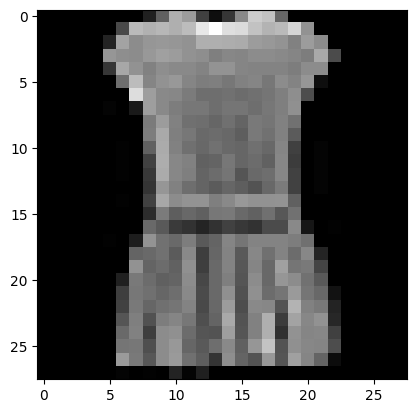

In [21]:
# Visualizar imagem
plt.imshow(X_train[3].reshape(28,28), cmap='gray')
plt.show()

In [24]:
# Criar um objeto KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)

# Ajustar o modelo aos dados de treinamento
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [25]:
# Ajustar o modelo aos dados de treinamento
y_pred = knn.predict(X_test)

In [32]:
# Avaliar a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%:" % (accuracy * 100))


Accuracy: 84.60%:


## Usando validação cruzada para obter o melhor valor de k

In [75]:
k_values = np.array([i for i in range (1,31)])
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_test, y_test, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

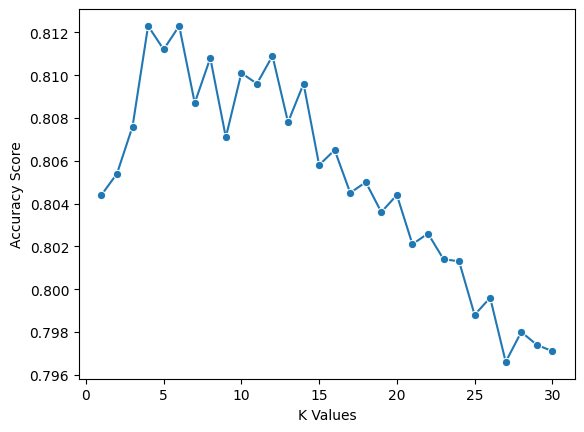

In [79]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [81]:
for k, score in zip(k_values, scores):
    print("K = %d, Accuracy = %.2f%%" % (k, score * 100))


K = 1, Accuracy = 80.44%
K = 2, Accuracy = 80.54%
K = 3, Accuracy = 80.76%
K = 4, Accuracy = 81.23%
K = 5, Accuracy = 81.12%
K = 6, Accuracy = 81.23%
K = 7, Accuracy = 80.87%
K = 8, Accuracy = 81.08%
K = 9, Accuracy = 80.71%
K = 10, Accuracy = 81.01%
K = 11, Accuracy = 80.96%
K = 12, Accuracy = 81.09%
K = 13, Accuracy = 80.78%
K = 14, Accuracy = 80.96%
K = 15, Accuracy = 80.58%
K = 16, Accuracy = 80.65%
K = 17, Accuracy = 80.45%
K = 18, Accuracy = 80.50%
K = 19, Accuracy = 80.36%
K = 20, Accuracy = 80.44%
K = 21, Accuracy = 80.21%
K = 22, Accuracy = 80.26%
K = 23, Accuracy = 80.14%
K = 24, Accuracy = 80.13%
K = 25, Accuracy = 79.88%
K = 26, Accuracy = 79.96%
K = 27, Accuracy = 79.66%
K = 28, Accuracy = 79.80%
K = 29, Accuracy = 79.74%
K = 30, Accuracy = 79.71%


## O melhor valor de k é 4 ou 6, qualquer um deles pode ser usado

In [10]:
knn_2 = KNeighborsClassifier(n_neighbors=4)
knn_2.fit(X_train, y_train)
y_pred = knn_2.predict(X_test)

In [11]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%:" % (accuracy * 100))

Accuracy: 85.77%:


#### Usando o melhor valor de k para classificar as imagens de teste e calcular a acurácia, chego a conclusão que o para o melhor valor de k, a acurácia medida é um bom resultado, indicando como o modelo se comporta bem com novos dados.